In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df=df.drop('Unnamed: 32', axis=1)


In [5]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

# Missing Value

In [6]:
k= pd.DataFrame()
k['df']= df.isnull().sum()
k.T

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
df,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Obs
* There is no missing values
* It is well settled dataset

In [7]:
from scipy import stats


# Peasron correlation and P-values

In [8]:
cor_df=pd.DataFrame(columns=['r','p-value'])
for col in df:
   # print(col)
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p=stats.pearsonr(df.diagnosis, df[col])
        cor_df.loc[col]=[r, p]
cor_df

,r,p-value
id,0.039769,3.436819e-01
diagnosis,1.000000,0.000000e+00
radius_mean,0.730029,8.465941e-96
texture_mean,0.415185,4.058636e-25
perimeter_mean,0.742636,8.436251e-101
area_mean,0.708984,4.734564e-88
smoothness_mean,0.358560,1.051850e-18
compactness_mean,0.596534,3.938263e-56
concavity_mean,0.696360,9.966556e-84
concave points_mean,0.776614,7.101150e-116


In [9]:
cor_df.sort_values(by=['p-value'], ascending=False)


,r,p-value
symmetry_se,-0.006522,8.766418e-01
texture_se,-0.008303,8.433320e-01
fractal_dimension_mean,-0.012838,7.599368e-01
id,0.039769,3.436819e-01
smoothness_se,-0.067016,1.102966e-01
fractal_dimension_se,0.077972,6.307355e-02
concavity_se,0.253730,8.260176e-10
compactness_se,0.292999,9.975995e-13
fractal_dimension_worst,0.323872,2.316432e-15
symmetry_mean,0.330499,5.733384e-16


In [10]:
col=['symmetry_se', 'texture_se', 'fractal_dimension_mean']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

# Logistic Regresion

In [11]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/sc

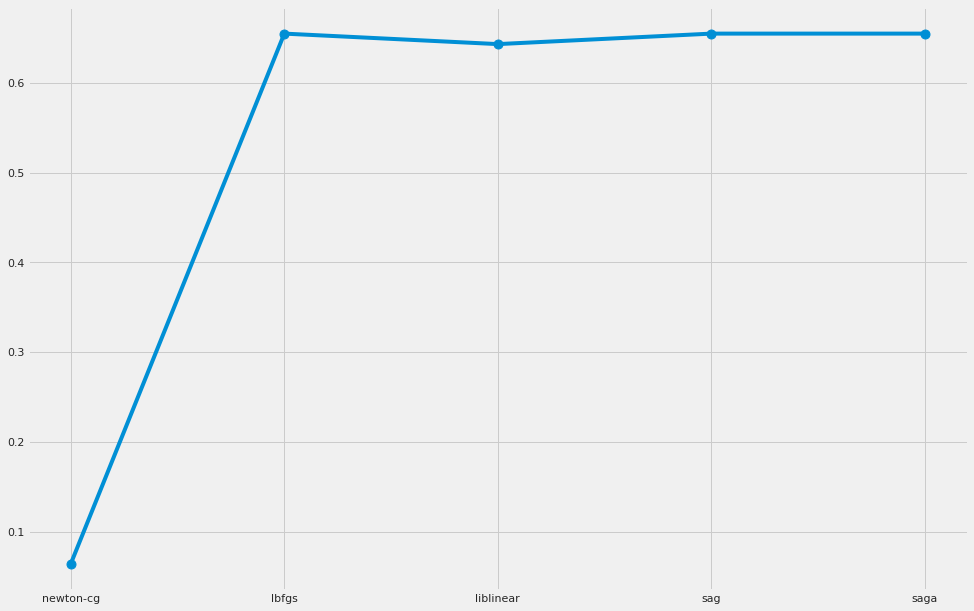

In [12]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
error_rate=[]
for s in solver:
    
    lr=LogisticRegression(solver=s)
    lr.fit(X_train, y_train)
    pred=lr.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
plt.figure(figsize=(15,10))
plt.plot(solver, error_rate,marker='o', markersize=9)

# Observation:
* Using the multiple solver we can see that "newton-cg" work good
* Error rate is very low for this 

In [13]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/sc

LogisticRegression(solver='newton-cg')

<AxesSubplot:>

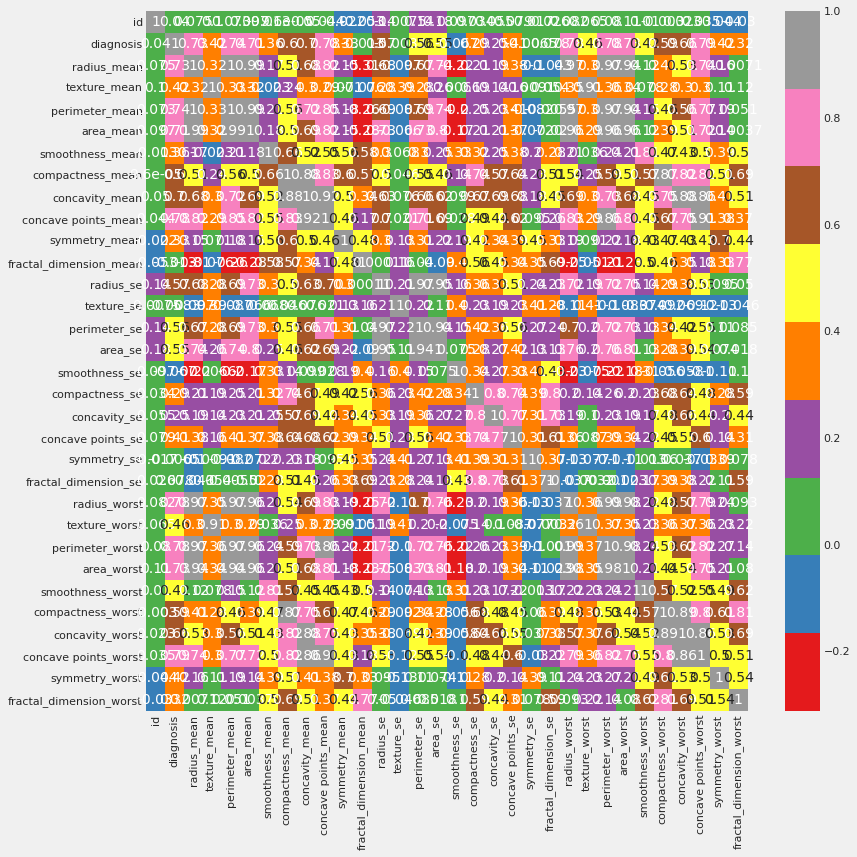

In [14]:
cor = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,cmap='Set1',annot=True)

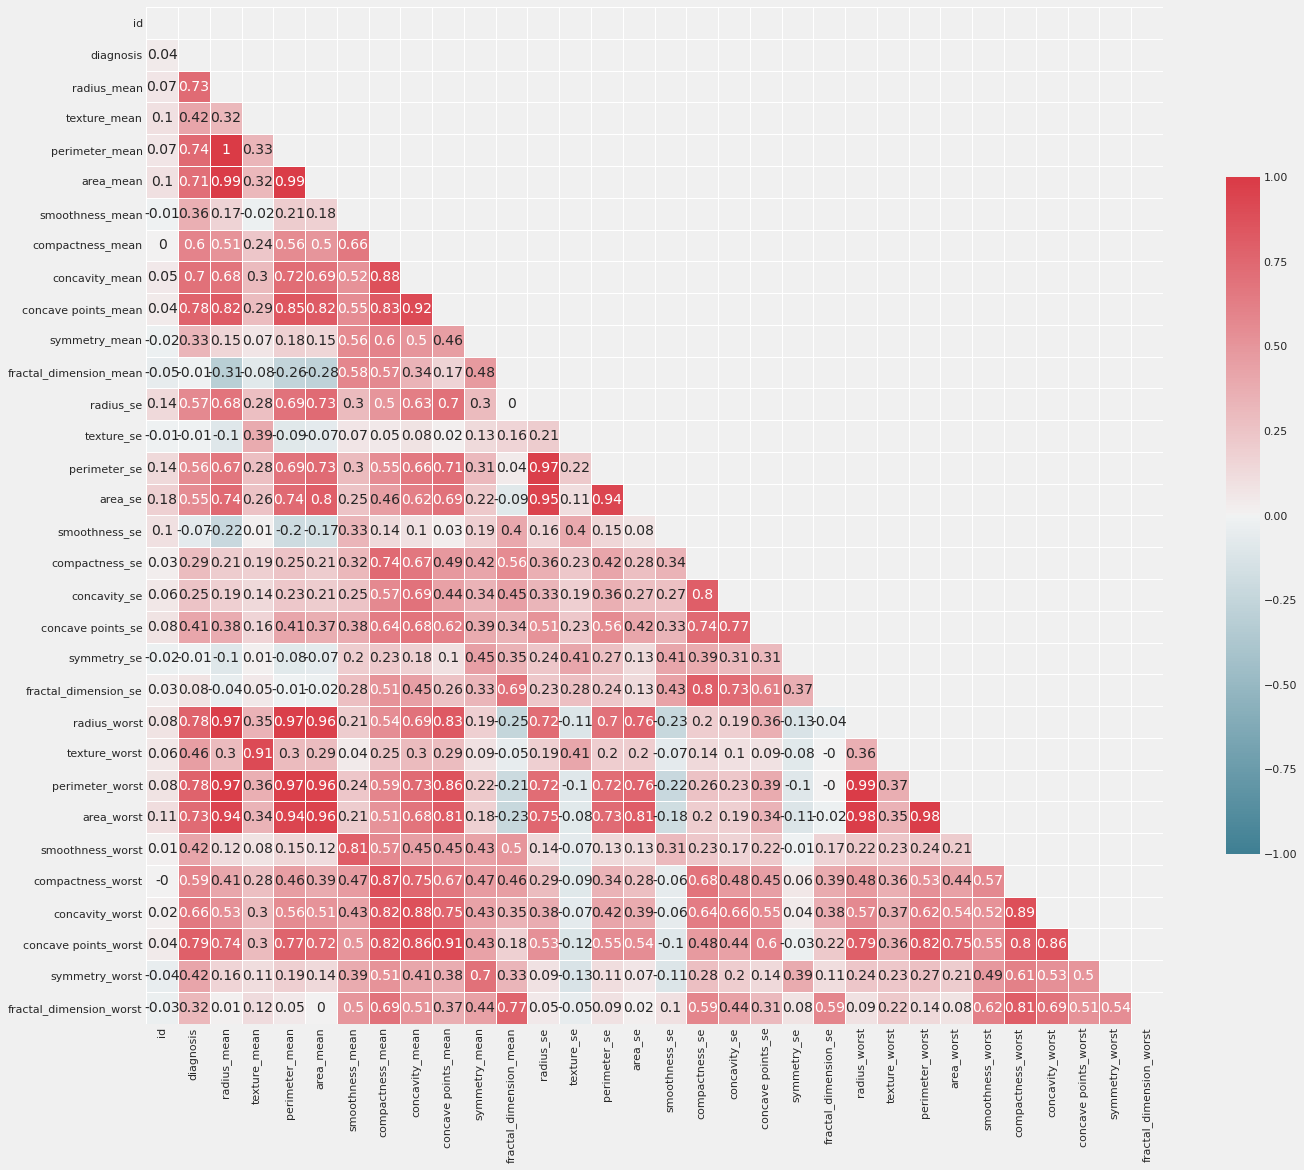

In [15]:
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [16]:
y_pred=lr.predict(X_train)


In [17]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9195979899497487
F1 Score:- 0.8896551724137931
Average Precision Score:- 0.8542044701826005
Log Loss:- 2.7770031191371447
Precision Score:- 0.9416058394160584
Recall Score:- 0.8431372549019608
ROC-AUC Score:- 0.9052420968387356


# Conclusion
* Removing the 3 features those having the high P-value 
* Using the logistic regression , using the different solver and calculating the error rate , we observe that error is low for the solver "newton-cg"
* One of the main thing is that Accuracy score is much higher using the logitic regression 
* Now the accuracy is increased 3 fold the previous score.
* Now the accuracy score is 0.91

In [18]:
y_test_pred=lr.predict(x_test)


In [19]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.935672514619883
F1 Score:- 0.9059829059829059
Average Precision Score:- 0.8559527105314426
Log Loss:- 2.221816013632565
Precision Score:- 0.9137931034482759
Recall Score:- 0.8983050847457628
ROC-AUC Score:- 0.9268311138014528


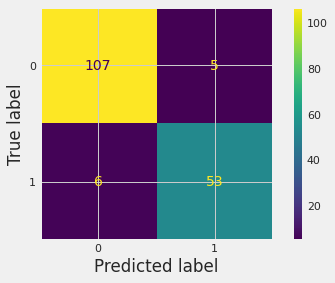

In [20]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot()

# Performing K-fold cross validation with Logistic Regression

In [21]:
from sklearn.model_selection import cross_val_score    
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/sc

[0.9122807  0.9122807  0.9122807  0.94736842 0.94736842 0.9122807
 0.98245614 0.9122807  0.89473684 0.94642857]
-------------------
0.9279761904761905


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       112
           1       0.91      0.90      0.91        59

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [23]:
y_test_pred_prob=lr.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.977451573849879

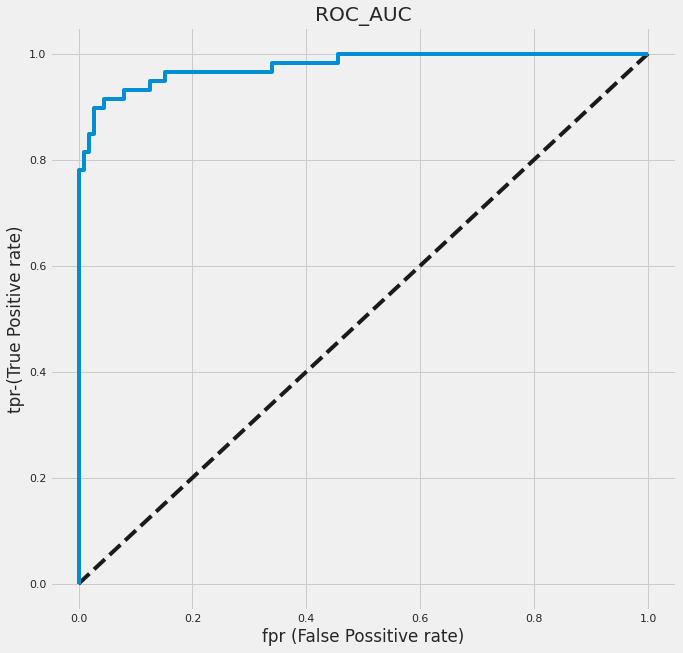

In [24]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

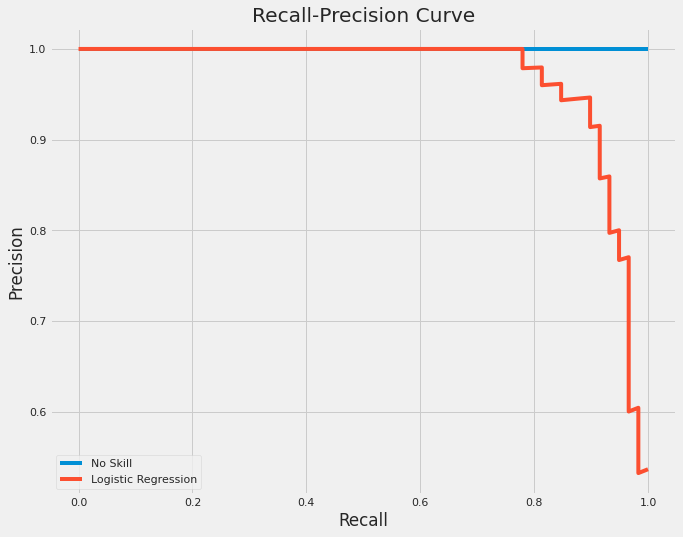

In [25]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# K-NN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
col=['symmetry_se', 'texture_se', 'fractal_dimension_mean']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

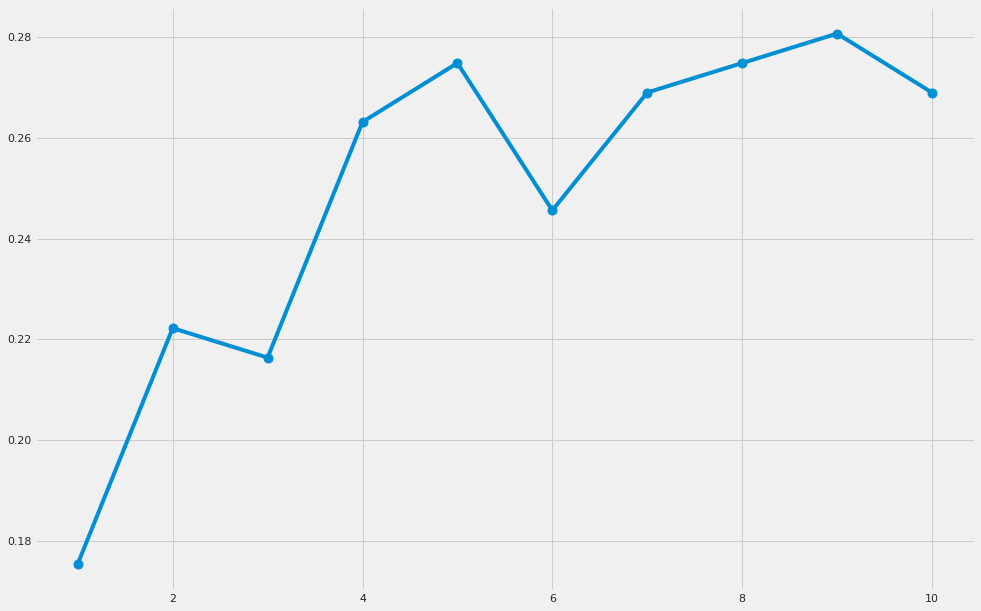

In [27]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)

# Conclusion:-
As we can see that the optimum K in KNN we get is K=3.

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred=knn.predict(X_train)


In [30]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.8743718592964824
F1 Score:- 0.8161764705882353
Average Precision Score:- 0.7822453841128529
Log Loss:- 4.339058332977326
Precision Score:- 0.9327731092436975
Recall Score:- 0.7254901960784313
ROC-AUC Score:- 0.8464185674269709


# Conclusion:
* As we can see that in my previsous notebook the accuracy was 76%, while in this case the accuracy is 87.43%.
* It is observed that removing the two feature help ub increasing the accuracy of the dataset using KNN model as prediction
* Log Loss is decreased as it was 8.482 and now it is 4.33
* ROC-AUC is improved , now it is 0.846 , which is no improvement of previous results in last notbook

In [31]:
y_test_pred=knn.predict(x_test)


In [32]:
knn_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",knn_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.783625730994152
F1 Score:- 0.6476190476190476
Average Precision Score:- 0.5721384029959448
Log Loss:- 7.4733586069056
Precision Score:- 0.7391304347826086
Recall Score:- 0.576271186440678
ROC-AUC Score:- 0.7345641646489105


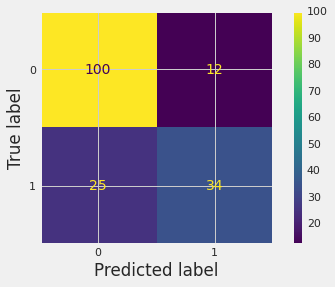

In [33]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=knn.classes_)
disp.plot()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.74      0.58      0.65        59

    accuracy                           0.78       171
   macro avg       0.77      0.73      0.75       171
weighted avg       0.78      0.78      0.78       171



In [35]:
y_test_pred_prob=knn.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.8064467312348667

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

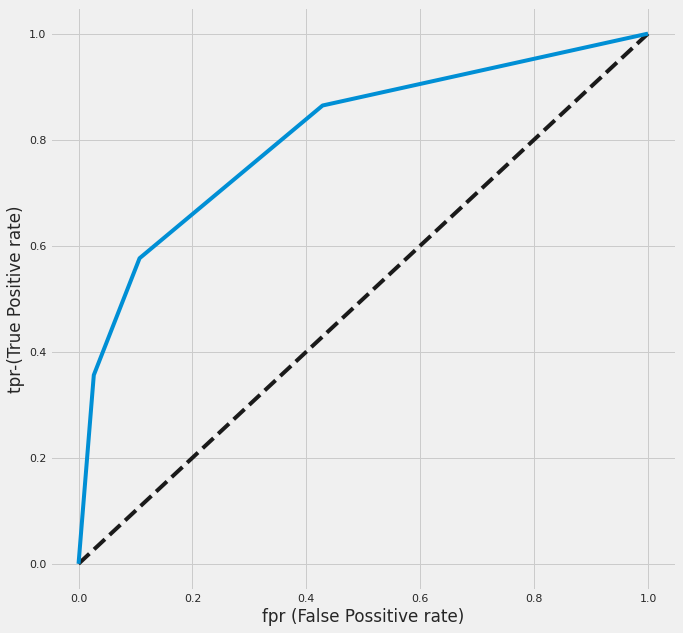

In [36]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title

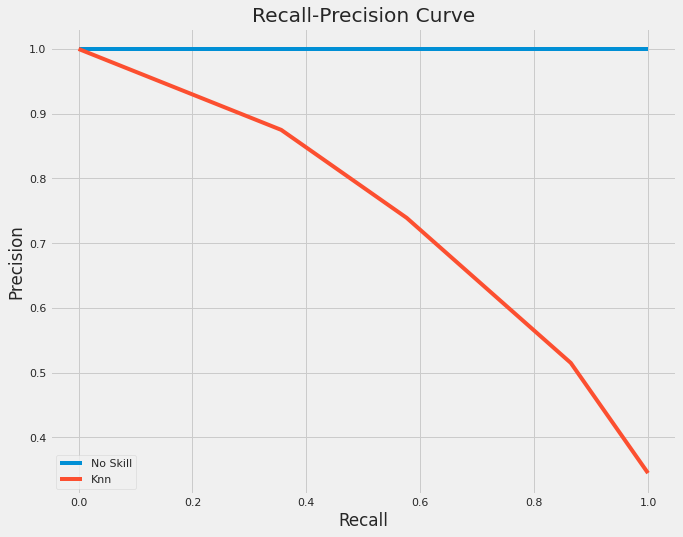

In [37]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Knn")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Simple Cross validation 

In [38]:
# train, cv, test
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
X_tr, X_cv, y_tr, y_cv = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.metrics import accuracy_score
hist = {
    'ks': [],
    'acc_cv': [],
    'acc_tr': []
}

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting cv train
    knn.fit(X_tr, y_tr)
    # predict and eval  cv train
    pred_cv = knn.predict(X_cv)
    pred_tr = knn.predict(X_tr)
    acc_cv = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    acc_tr  = accuracy_score(y_tr, pred_tr, normalize=True) * float(100)
    print(f"k:{k}\t val-acc: {acc_cv} \ttrain-acc: {acc_tr}")
    
    # log
    hist['ks'].append(k)    
    hist['acc_cv'].append(acc_cv)    
    hist['acc_tr'].append(acc_tr)

k:1	 val-acc: 85.38011695906432 	train-acc: 100.0
k:3	 val-acc: 83.04093567251462 	train-acc: 87.93969849246231
k:5	 val-acc: 81.87134502923976 	train-acc: 81.90954773869346
k:7	 val-acc: 77.77777777777779 	train-acc: 74.62311557788944
k:9	 val-acc: 76.60818713450293 	train-acc: 72.8643216080402
k:11	 val-acc: 72.51461988304094 	train-acc: 71.60804020100502
k:13	 val-acc: 73.09941520467837 	train-acc: 69.84924623115577
k:15	 val-acc: 74.26900584795322 	train-acc: 69.09547738693468
k:17	 val-acc: 75.43859649122807 	train-acc: 68.84422110552764
k:19	 val-acc: 74.26900584795322 	train-acc: 67.58793969849246
k:21	 val-acc: 74.26900584795322 	train-acc: 67.08542713567839
k:23	 val-acc: 71.9298245614035 	train-acc: 68.34170854271356
k:25	 val-acc: 72.51461988304094 	train-acc: 67.33668341708542
k:27	 val-acc: 74.85380116959064 	train-acc: 67.08542713567839
k:29	 val-acc: 72.51461988304094 	train-acc: 66.83417085427136
k:31	 val-acc: 71.34502923976608 	train-acc: 67.33668341708542
k:33	 val-a

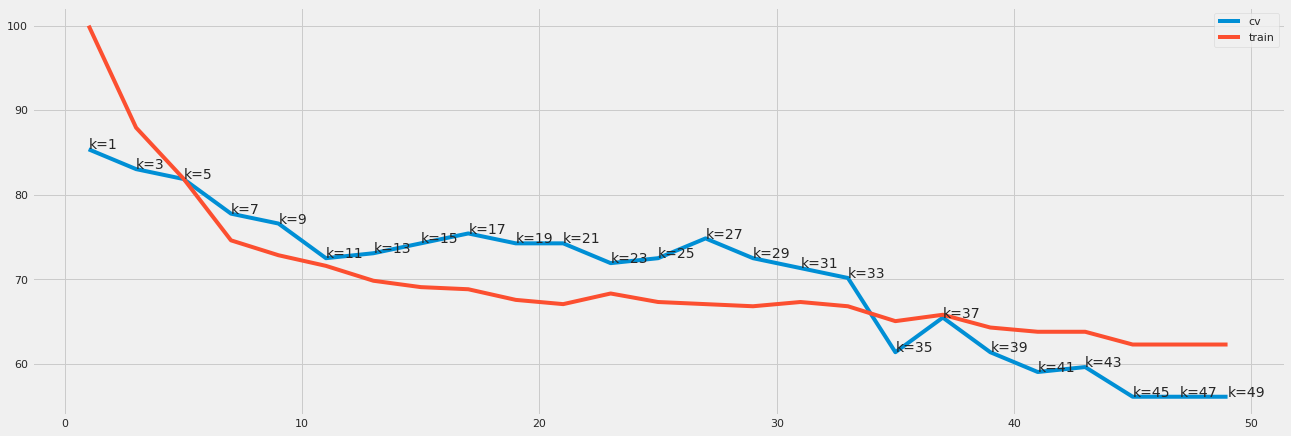

In [40]:
plt.figure(figsize=(20, 7))

plt.plot(hist['ks'], hist['acc_cv'], label='cv')
plt.plot(hist['ks'], hist['acc_tr'], label='train')

for k, acc_cv in zip(hist['ks'], hist['acc_cv']):
    plt.text(k, acc_cv, f'k={k}')

plt.legend()
plt.show()

# k=31 looks good

In [41]:
k = 31

knn = KNeighborsClassifier(n_neighbors=k)
# fitting cv train
knn.fit(X_tr, y_tr)
# predict and eval  cv train
pred_cv = knn.predict(X_cv)
acc_cv = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
print(f"k:{k}\t val-acc: {acc_cv}")

k:31	 val-acc: 71.34502923976608


# K-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score


In [43]:
hist = {
    'ks': [],
    'acc_cv': []
}

for k in range(0, 60):
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, X_train, y_train, cv=10) # 10-fold
    # 95% conf-interval: scores.mean() (+/- 2*scores.std())
    
    # log
    hist['ks'].append(k)
    hist['acc_cv'].append(scores.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 469, in _fit
    self.n_neighbors
ValueError: Expected n_neighbors > 0. Got 0


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/mo

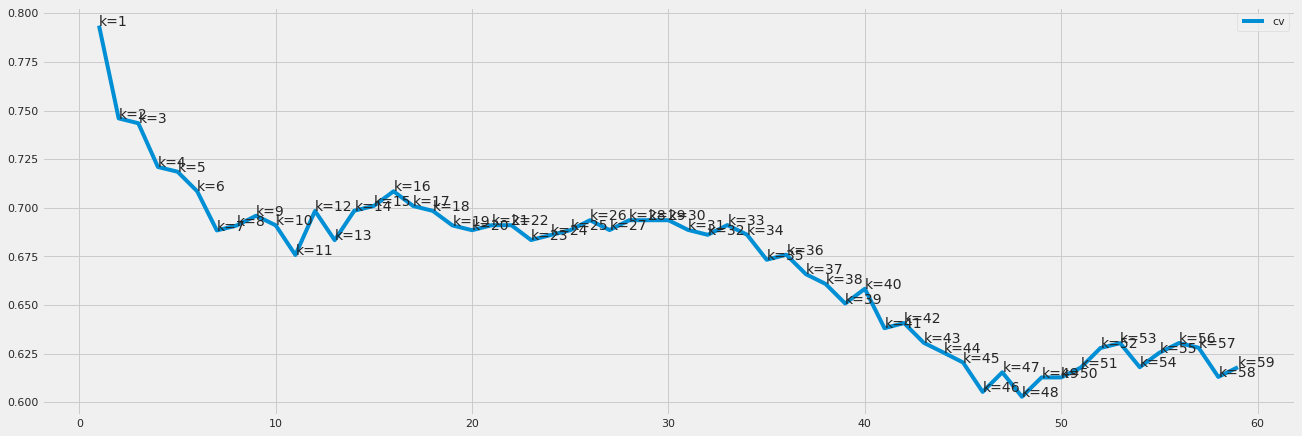

In [44]:
plt.figure(figsize=(20, 7))

plt.plot(hist['ks'], hist['acc_cv'], label='cv')

for k, acc_cv in zip(hist['ks'], hist['acc_cv']):
    plt.text(k, acc_cv, f'k={k}')

plt.legend()
plt.show()

# K-16 is good

In [45]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [46]:
y_pred=knn.predict(X_train)


In [47]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.7185929648241206
F1 Score:- 0.48623853211009177
Average Precision Score:- 0.5337097756252352
Log Loss:- 9.719478772359697
Precision Score:- 0.8153846153846154
Recall Score:- 0.3464052287581699
ROC-AUC Score:- 0.6487128184607176


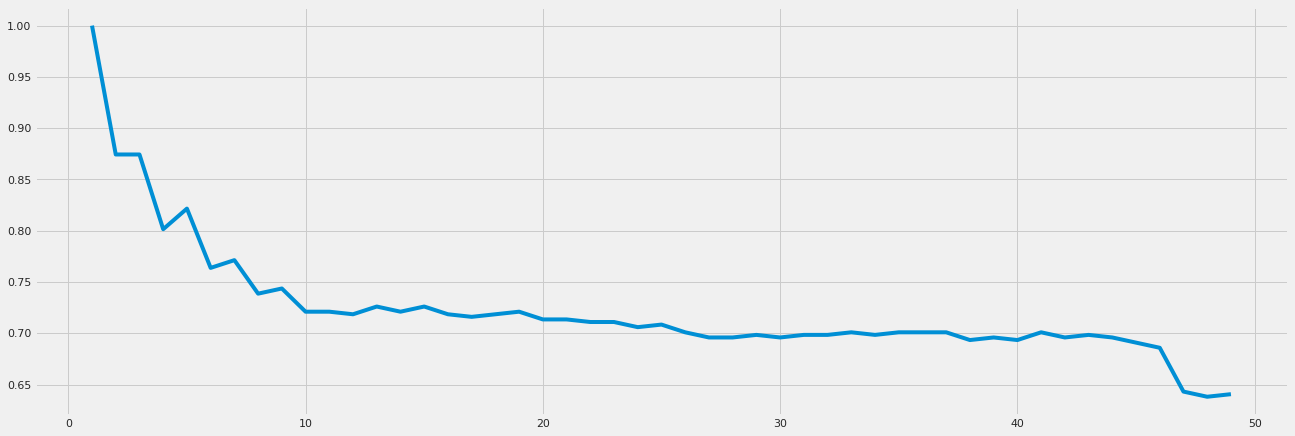

In [48]:
plt.figure(figsize=(20, 7))
acc_score=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_train)
    acc_score.append(metrics.accuracy_score(y_train, y_pred))
    
plt.plot(range(1, 50),acc_score , label="accuracy score")
    


# Obs
* As K increase the accuracy decrease
* K is hyperparameter ,
* K-3 is good to find the accuracy of the dataset

# SVC -Support Vector Classifier

In [49]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
svc=SVC(kernel='poly', C=1.0) #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_train)

In [52]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9274725274725275
F1 Score:- 0.8925081433224756
Average Precision Score:- 0.878409825468649
Log Loss:- 2.505010156114402
Precision Score:- 1.0
Recall Score:- 0.8058823529411765
ROC-AUC Score:- 0.9029411764705882


In [53]:
y_test_pred=svc.predict(X_test)

In [54]:
svc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",svc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.9210526315789473
F1 Score:- 0.88
Average Precision Score:- 0.8646616541353384
Log Loss:- 2.7267455048613707
Precision Score:- 1.0
Recall Score:- 0.7857142857142857
ROC-AUC Score:- 0.8928571428571428


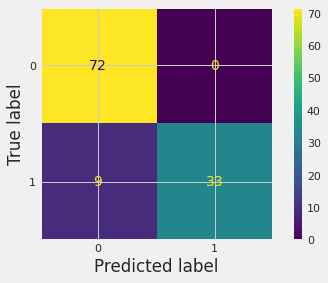

In [55]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=svc.classes_)
disp.plot()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        72
           1       1.00      0.79      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



In [57]:
y_test_pred_prob=lr.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.2943121693121693

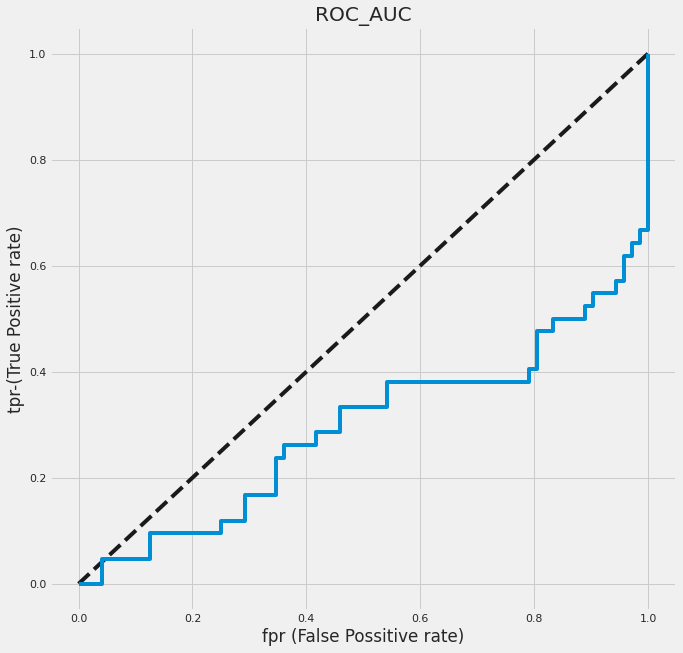

In [58]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

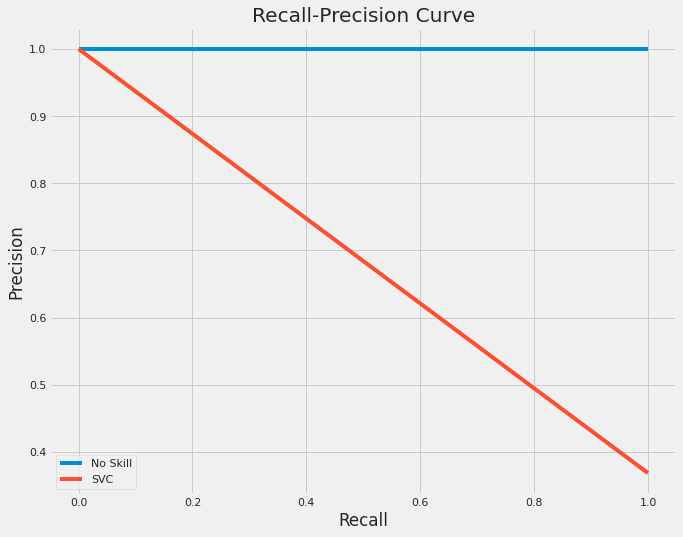

In [59]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="SVC")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Decision Tree Clasifiers

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
col=['symmetry_se', 'texture_se', 'fractal_dimension_mean']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [62]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [63]:
y_pred_gini = clf_gini.predict(X_train)

In [64]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred_gini))
print("F1 Score:-", metrics.f1_score(y_train, y_pred_gini))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred_gini))
print("Log Loss:-", metrics.log_loss(y_train, y_pred_gini))
print("Precision Score:-", metrics.precision_score(y_train, y_pred_gini))
print("Recall Score:-", metrics.recall_score(y_train, y_pred_gini))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred_gini))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [65]:
y_test_pred= clf_gini.predict(x_test)


In [66]:
dc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


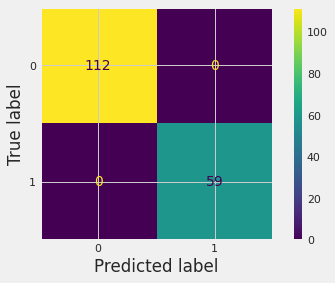

In [67]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_gini.classes_)
disp.plot()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [69]:
y_test_pred_prob=clf_gini.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

1.0

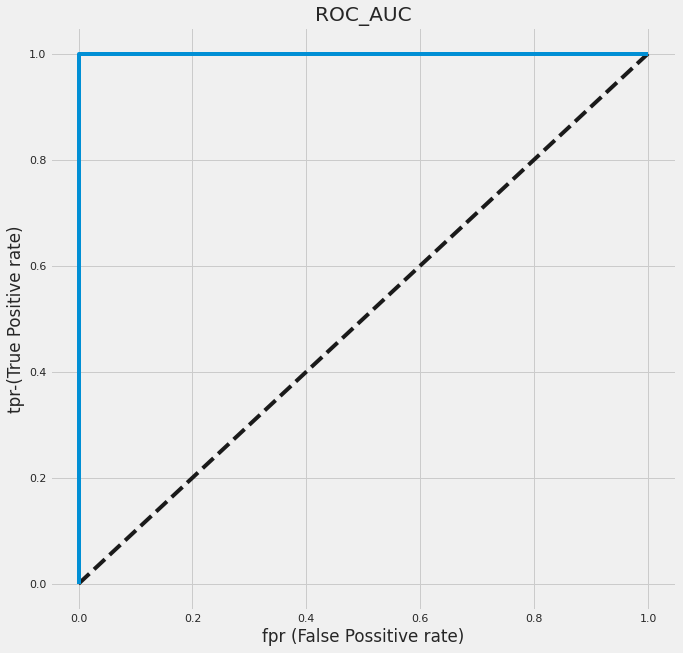

In [70]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

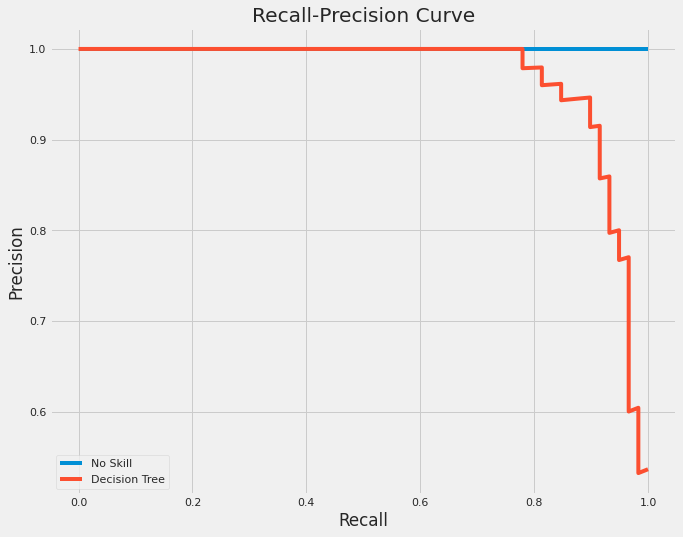

In [71]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Visualize decision-trees

[Text(375.84, 349.92, 'X[1] <= 0.5\ngini = 0.473\nsamples = 398\nvalue = [245, 153]'),
 Text(187.92, 116.63999999999999, 'gini = 0.0\nsamples = 245\nvalue = [245, 0]'),
 Text(563.76, 116.63999999999999, 'gini = 0.0\nsamples = 153\nvalue = [0, 153]')]

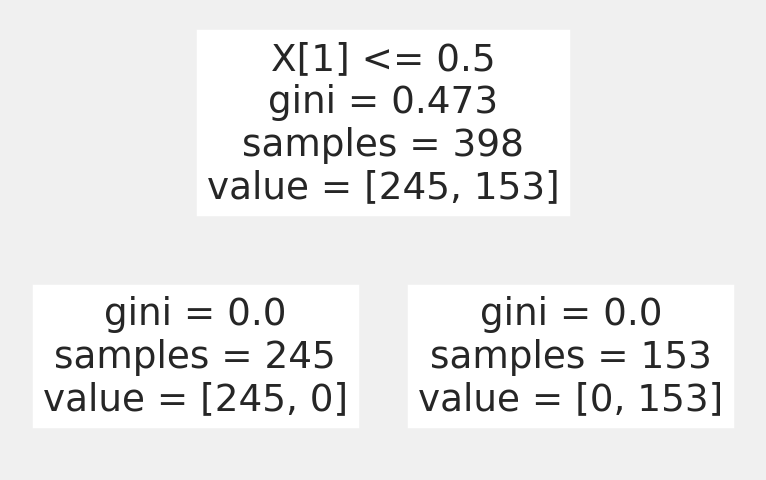

In [72]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree Classifier with criterion entropy

In [73]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

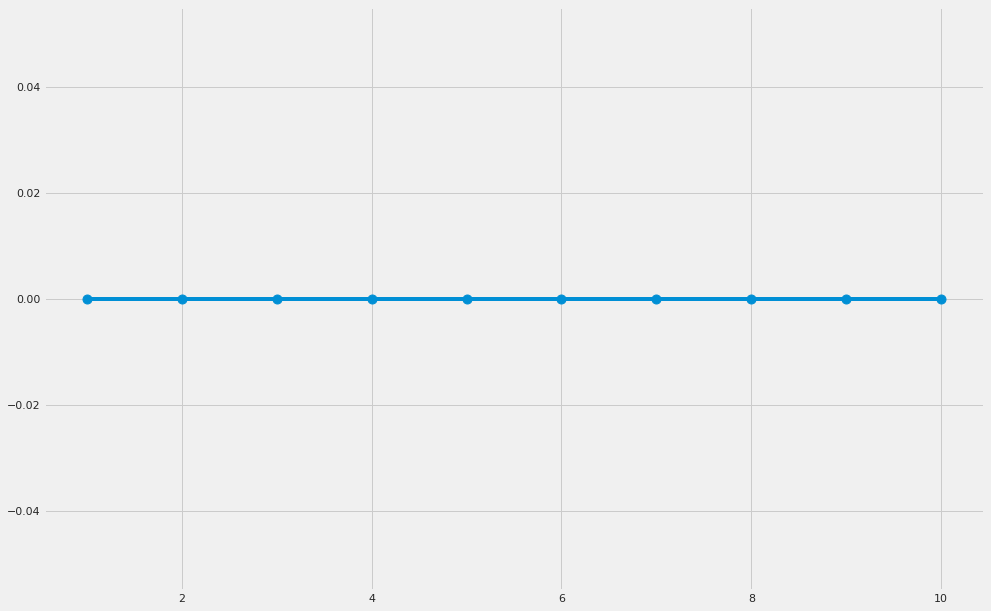

In [74]:
error_rate=[]
for i in range(1,11):
    clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)


    # fit the model
    clf_en.fit(X_train, y_train)
    pred=clf_en.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)
    

In [75]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [76]:
y_pred=clf_en.predict(X_train)


In [77]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [78]:
y_test_pred=clf_en.predict(x_test)


In [79]:
dc_en_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_en_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


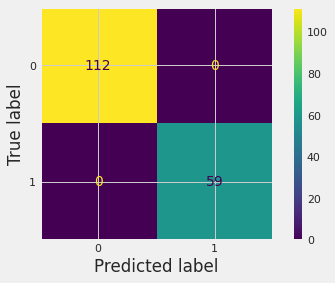

In [80]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_en.classes_)
disp.plot()

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [82]:
y_test_pred_prob=clf_gini.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

1.0

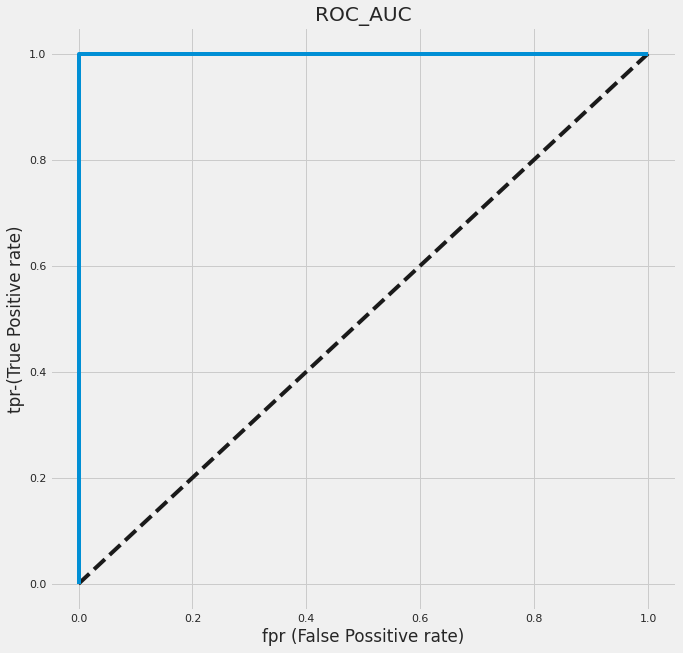

In [83]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DEcision Tree with Entropy')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

# Removing the other features 

In [84]:
col=['symmetry_se', 'texture_se','fractal_dimension_mean', 'smoothness_se']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [85]:
lr=LogisticRegression(solver="newton-cg")
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/opt/conda/lib/python3.7/site-packages/sc

LogisticRegression(solver='newton-cg')

In [86]:
y_pred=lr.predict(X_train)


In [87]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9120603015075377
F1 Score:- 0.8797250859106529
Average Precision Score:- 0.8387920944116243
Log Loss:- 3.037349672854714
Precision Score:- 0.927536231884058
Recall Score:- 0.8366013071895425
ROC-AUC Score:- 0.8978924903294652


In [88]:
y_test_pred=lr.predict(x_test)

In [89]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.9473684210526315
F1 Score:- 0.9217391304347826
Average Precision Score:- 0.8852693173611996
Log Loss:- 1.8178443645993383
Precision Score:- 0.9464285714285714
Recall Score:- 0.8983050847457628
ROC-AUC Score:- 0.9357596852300242


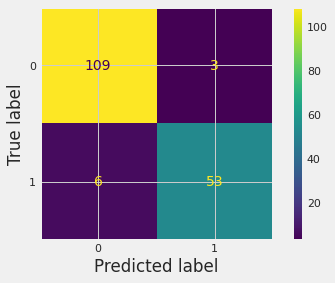

In [90]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot() 

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       112
           1       0.95      0.90      0.92        59

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [92]:
y_test_pred_prob=lr.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.976997578692494

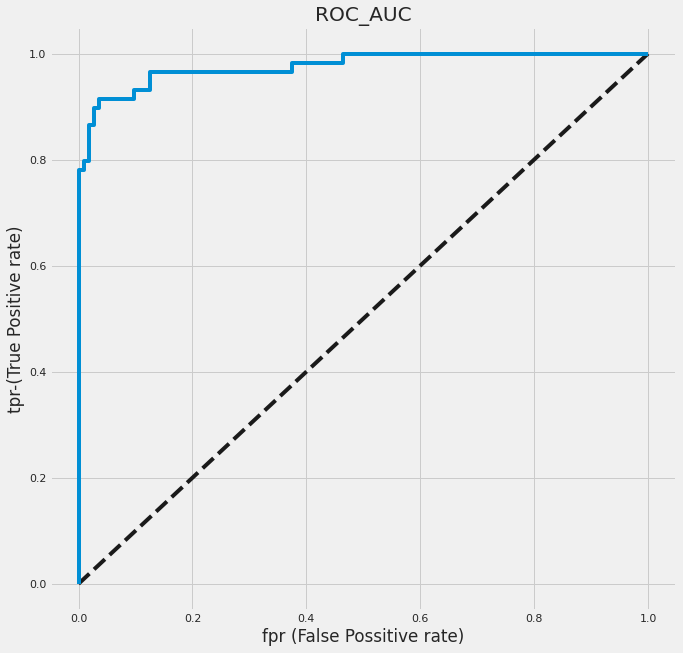

In [93]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

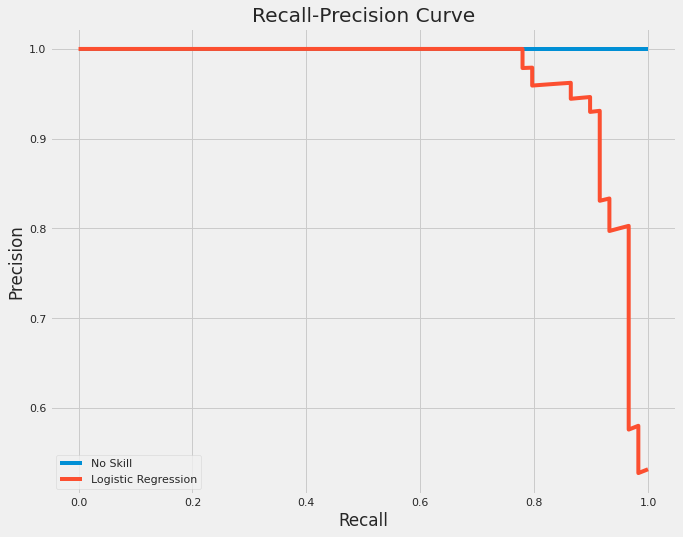

In [94]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# KNN

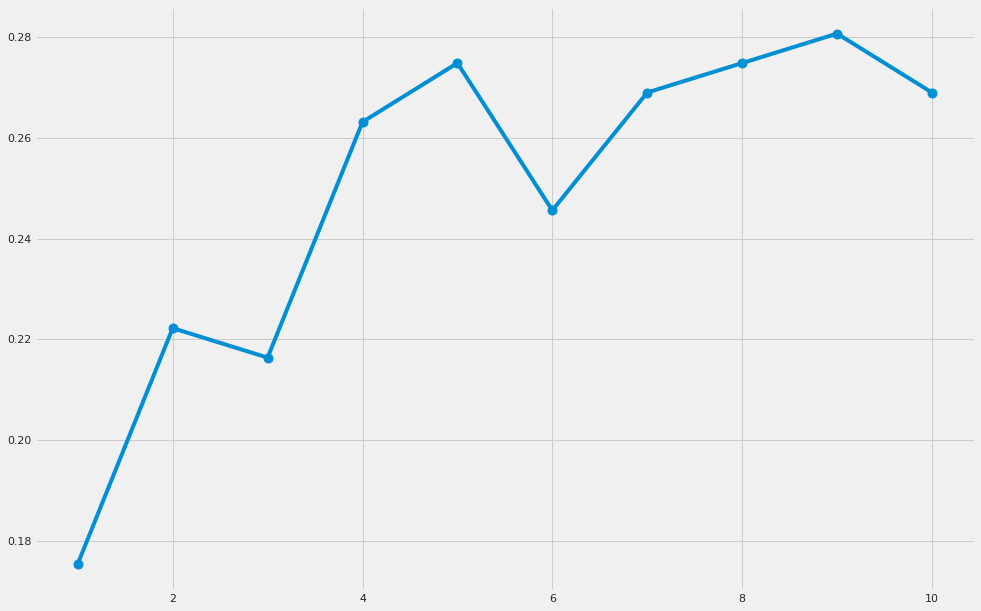

In [95]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)

In [96]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9120603015075377
F1 Score:- 0.8797250859106529
Average Precision Score:- 0.8387920944116243
Log Loss:- 3.037349672854714
Precision Score:- 0.927536231884058
Recall Score:- 0.8366013071895425
ROC-AUC Score:- 0.8978924903294652


In [98]:
y_pred=knn.predict(X_train)


In [99]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.8743718592964824
F1 Score:- 0.8161764705882353
Average Precision Score:- 0.7822453841128529
Log Loss:- 4.339058332977326
Precision Score:- 0.9327731092436975
Recall Score:- 0.7254901960784313
ROC-AUC Score:- 0.8464185674269709


In [100]:
y_test_pred=knn.predict(x_test)


In [101]:
knn_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",knn_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.783625730994152
F1 Score:- 0.6476190476190476
Average Precision Score:- 0.5721384029959448
Log Loss:- 7.4733586069056
Precision Score:- 0.7391304347826086
Recall Score:- 0.576271186440678
ROC-AUC Score:- 0.7345641646489105


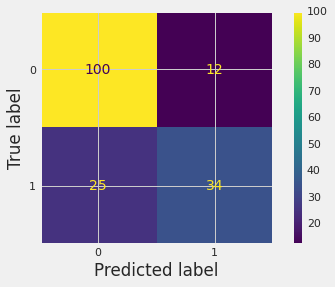

In [102]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=knn.classes_)
disp.plot() 

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.74      0.58      0.65        59

    accuracy                           0.78       171
   macro avg       0.77      0.73      0.75       171
weighted avg       0.78      0.78      0.78       171



In [104]:
y_test_pred_prob=knn.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.8064467312348667

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

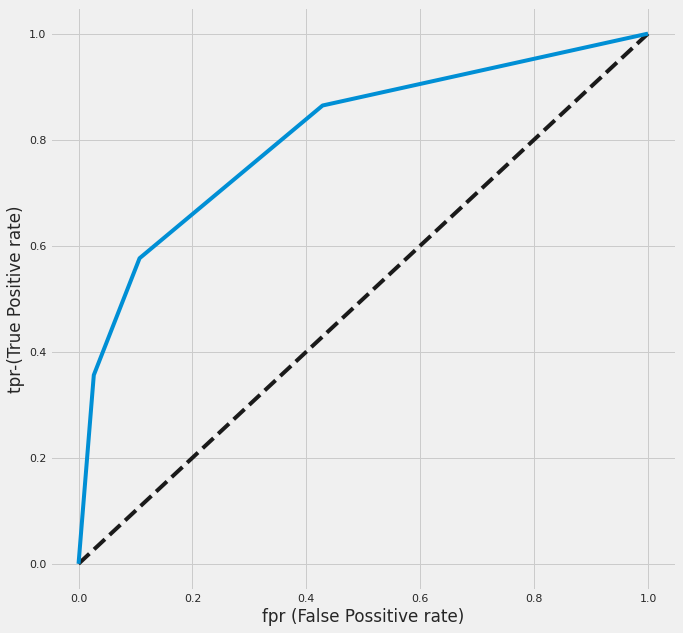

In [105]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title

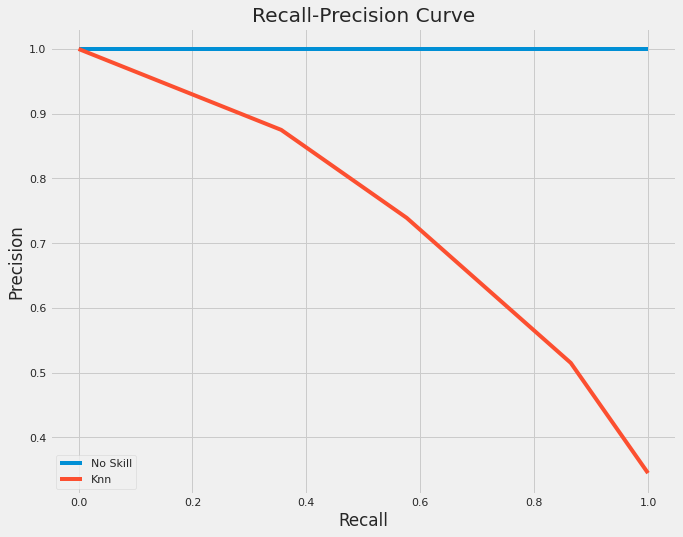

In [106]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Knn")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# SVC -Support Vector Classifier

In [107]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [109]:
svc=SVC(kernel='poly', C=1.0) #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_train)

In [110]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9274725274725275
F1 Score:- 0.8925081433224756
Average Precision Score:- 0.878409825468649
Log Loss:- 2.505010156114402
Precision Score:- 1.0
Recall Score:- 0.8058823529411765
ROC-AUC Score:- 0.9029411764705882


In [111]:
y_test_pred=svc.predict(X_test)


In [112]:
svc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",svc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.9385964912280702
F1 Score:- 0.9090909090909091
Average Precision Score:- 0.8947368421052632
Log Loss:- 2.1208020593366212
Precision Score:- 1.0
Recall Score:- 0.8333333333333334
ROC-AUC Score:- 0.9166666666666667


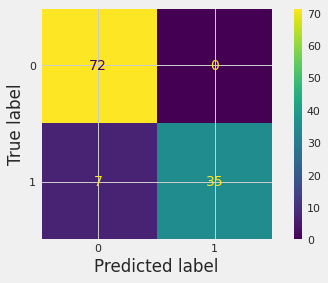

In [113]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=svc.classes_)
disp.plot()

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [115]:
y_test_pred_prob=lr.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.164021164021164

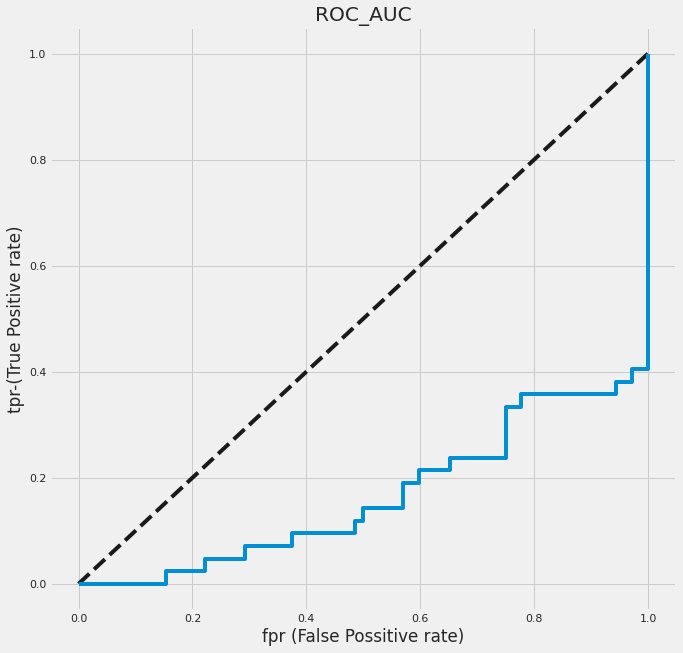

In [116]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

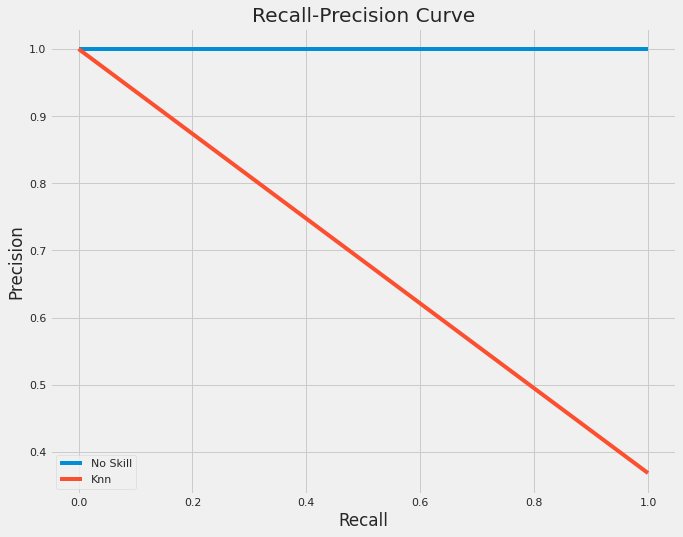

In [117]:
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Knn")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Decision Tree Clasifiers

In [118]:
col=['symmetry_se', 'texture_se','fractal_dimension_mean', 'smoothness_se']

X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [119]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [120]:
y_pred_gini = clf_gini.predict(X_train)


In [121]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred_gini))
print("F1 Score:-", metrics.f1_score(y_train, y_pred_gini))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred_gini))
print("Log Loss:-", metrics.log_loss(y_train, y_pred_gini))
print("Precision Score:-", metrics.precision_score(y_train, y_pred_gini))
print("Recall Score:-", metrics.recall_score(y_train, y_pred_gini))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred_gini))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [122]:
y_test_pred= clf_gini.predict(X_test)


In [123]:
dc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


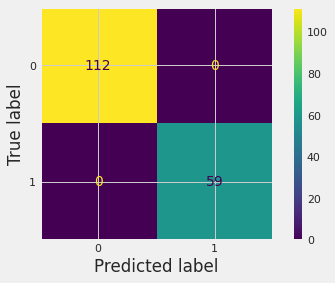

In [124]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_gini.classes_)
disp.plot()

# Conclusion
* Uing the multiple classifier we came to the conclusion that
* Logistic regression works good
* As other classifier is either making the dataset as underfit or overfit
* OVERFIT- using the Decision Tree , Random Forest 
* Underfit- KNN, SVM
